# Meena Lohani and Hulya Dogan
### Group Project
#### December 14, 2021

# Utilities

In [2]:
import os
import sys
# including modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import operator
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta


from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, plot_confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from IPython.display import Image
import seaborn as sns


In [3]:
# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Acs data 2012 and 2019 processing 

In [4]:
#Acsedited data 2010 data to train the model
data1 = pd.read_stata("acs_12.dta")
df12 = data1[['statefip', 'countyfip','hhincome', 'foodstmp', 'marst','race', 'educ','hcovany']]
df12.head(1)

,statefip,countyfip,hhincome,foodstmp,marst,race,educ,hcovany
0,California,0,50790,No,"Married, spouse present",White,Grade 12,With health insurance coverage


In [5]:
#Acsedited data 2019 to test the model
data = pd.read_stata("acs_19.dta")
df19 = data[['statefip', 'countyfip','hhincome', 'foodstmp', 'marst','race', 'educ', 'hcovany']]

In [6]:
#categorizing the foodstamp and insurance data
df12['Foodstamp'] = np.where(df12['foodstmp']== 'Yes', 1, 0)
df12['Insurance_Status'] = np.where(df12['hcovany']== 'With health insurance coverage', 1, 0)

ms_data12 = df12.copy()
ms_data12.drop(['foodstmp','hcovany'],axis=1, inplace=True)
ms_data12.head(1)

,statefip,countyfip,hhincome,marst,race,educ,Foodstamp,Insurance_Status
0,California,0,50790,"Married, spouse present",White,Grade 12,0,1


In [7]:
### Check for any null values. No null values are found in the dataframe
#df1.isnull().values.any()

### Statistics for the income column
#df12['hhincome'].describe()

In [8]:
#categorizing the foodstamp and insurance data
df19['Foodstamp'] = np.where(df19['foodstmp']== 'Yes', 1, 0)
df19['Insurance_Status'] = np.where(df19['hcovany']== 'With health insurance coverage', 1, 0)

ms_data19 = df19.copy()
ms_data19.drop(['foodstmp','hcovany'],axis='columns', inplace=True)

ms_data19.head(1)

,statefip,countyfip,hhincome,marst,race,educ,Foodstamp,Insurance_Status
0,California,37,117407,Divorced,White,5+ years of college,0,1


In [9]:
#dummy variable to deal with the categorical data of 2012
x__ = ms_data12.drop(['Insurance_Status'], axis = 1)

X_ = pd.get_dummies(x__) #feature names
y_ = ms_data12.iloc[:,-1:] #target variable (class label)

In [10]:
#dummy variable to deal with the categorical data of 2019
x_ = ms_data19.drop('Insurance_Status', axis = 1)
X = pd.get_dummies(x_) #feature names
y = ms_data19.iloc[:,-1:] #target variable (class label)


In [11]:
X_.head(1)
#y_.head(1)


,countyfip,hhincome,Foodstamp,statefip_California,statefip_New Jersey,statefip_New York,"marst_Married, spouse present","marst_Married, spouse absent",marst_Separated,marst_Divorced,marst_Widowed,marst_Never married/single,race_White,race_Black/African American/Negro,race_American Indian or Alaska Native,race_Chinese,race_Japanese,race_Other Asian or Pacific Islander,"race_Other race, nec",race_Two major races,race_Three or more major races,educ_N/A or no schooling,educ_Nursery school to grade 4,"educ_Grade 5, 6, 7, or 8",educ_Grade 9,educ_Grade 10,educ_Grade 11,educ_Grade 12,educ_1 year of college,educ_2 years of college,educ_4 years of college,educ_5+ years of college
0,0,50790,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [12]:
### Check for any null values. No null values are found in the dataframe
#df12.isnull().values.any()

### Statistics for the income column
#df12['hhincome'].describe()

# Splitting the data for training and testing

In [13]:
#Training the model using 2012 data
X_train = X_
y_train = y_

# Testing the model using 2019 data
X_test = X
y_test = y


In [14]:
##displays the values
# X_train.head(1)
# y_train.head(1)
# X_test.head(1)
# y_test.head(1)

# Naive-Bayes Analysis

In [15]:
#naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)

# Evaluation Naive-Bayes

In [16]:
from sklearn import metrics
# Naive-Bayes Model Accuracy before 10-fold CV, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy: 0.8890831151553972


In [17]:
# print the scores on training and test set

print('Training set accuracy score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set accuracy score: {:.4f}'.format(gnb.score(X_test, y_test)))


Training set accuracy score: 0.8249
Test set accuracy score: 0.8891


The training-set accuracy score is 0.8203 and the test-set accuracy score is 0.8801. Since there a sligght difference in the these two values,the data may have overfiited. Therefore, the 10-fold cross validation will be performed to see the average accuracy score.

In [18]:
# check class distribution in test set

#y_test.value_counts()

In [19]:
#naive bayes evaluation 
#Cross Validation (10-fold) average results of each fold
#Cross Validation is a very useful technique for assessing 
#the effectiveness of the model, particularly in cases where we need to mitigate over-fitting
score_nb = {'Precision': make_scorer(precision_score),'Recall': make_scorer(recall_score),
              'F-score': make_scorer(f1_score),'Accuracy': make_scorer(accuracy_score), 
              'MSE': make_scorer(mean_squared_error)}
scores_nb = cross_validate(gnb, X, y, cv = 10, scoring = score_nb)


In [110]:
#prints the report of Naive-Bayes tree model evaluation using 10-fold cross validation in previous step

print ('Naive Bayes: Averge scores of precision, recall, F-score, and accuracy of each fold (cv=10):\n' )
print('Precision: ',(scores_nb['test_Precision']).mean()*100)
print('Recall: ',(scores_nb['test_Recall']).mean()*100)
print('F-score: ',(scores_nb['test_F-score']).mean()*100)
print('Accuracy: ',(scores_nb['test_Accuracy']).mean()*100)
print('MSE: ',(scores_nb['test_MSE']).mean()*100)


Naive Bayes: Averge scores of precision, recall, F-score, and accuracy of each fold (cv=10):

Precision:  92.82873201413227
Recall:  95.38255926463475
F-score:  94.08079930598282
Accuracy:  88.9083097737833
MSE:  11.091690226216697


Interpretation

The accuracy of the model prior performing the 10-fold cross validation was 0.88, and after the cross-validation the average accuracy turns out to be similar to the original accuracy(0.88). Therefore, it can be concluded that the 10-fold cross-validation did not result in performance improvement for the Naive-Bayes model.



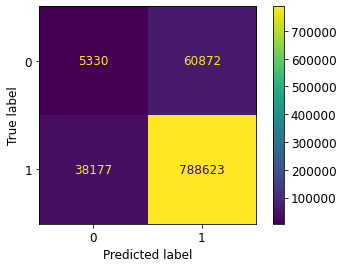

In [84]:
#Confusion metric of Perceptron Classifier model
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()


# Logistic regression Analysis

In [22]:
#Logistic regression analysis
lr = LogisticRegression(random_state = 0, multi_class = 'multinomial')
model=lr.fit(X_train, y_train)


In [103]:
y_pred_lr = lr.predict(X_test)


## L1 Penalty

In [106]:
lrl1 = LogisticRegression(random_state = 0, multi_class = 'multinomial', penalty = 'l1', solver='saga', max_iter = 500)
model_l1 = lrl1.fit(X_train, y_train)
y_pred_lr1 = model_l1.predict(X_test)



## Elastic Net Penalty

In [121]:
lrelastic = LogisticRegression(random_state = 0, multi_class = 'multinomial', penalty = 'elasticnet', solver='saga', 
                        l1_ratio = 0.3, C = 1, max_iter = 100)
model_elastic = lrelastic.fit(X_train, y_train)
y_pred_el = model_elastic.predict(X_test)


# Evaluation Logistic regression
### Regular Logistic Regression Classification

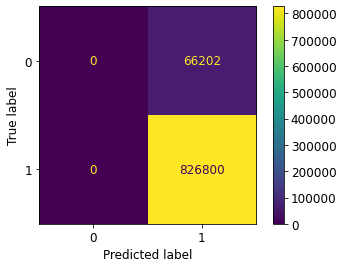

In [120]:

plot_confusion_matrix(model, X_test, y_test)

plt.show()



In [116]:
# Logistic regression Model Accuracy before 10-fold CV, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9258657875346303


In [30]:
#logistic regression analysis
#Cross Validation (10-fold) average results of each fold
#Cross Validation is a very useful technique for assessing 
#the effectiveness of the model, particularly in cases where we need to mitigate over-fitting
dict_lr = {'Precision': make_scorer(precision_score),'Recall': make_scorer(recall_score),
              'F-score': make_scorer(f1_score),'Accuracy': make_scorer(accuracy_score), 
              'MSE': make_scorer(mean_squared_error)}
scores_lr = cross_validate(model, X, y, cv = 10, scoring = dict_lr)


In [93]:
#prints the report of Logistic regression tree using 10-fold cross validation in previous step

print ('Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):\n' )
print('Precision: ',(scores_lr['test_Precision']).mean()*100)
print('Recall: ',(scores_lr['test_Recall']).mean()*100)
print('F-score: ',(scores_lr['test_F-score']).mean()*100)
print('Accuracy: ',(scores_lr['test_Accuracy']).mean()*100)
print('MSE: ',(scores_lr['test_MSE']).mean()*100)


Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):

Precision:  92.58657875532069
Recall:  100.0
F-score:  96.15060338393286
Accuracy:  92.58657875532069
MSE:  7.413421244679327


### L1 Logistic Regression Classification

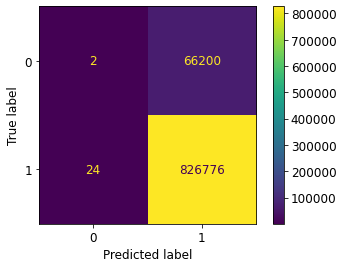

In [117]:
plot_confusion_matrix(model_l1, X_test, y_test)
plt.show()


In [95]:
#logistic regression analysis lr 1
#Cross Validation (10-fold) average results of each fold
#Cross Validation is a very useful technique for assessing 
#the effectiveness of the model, particularly in cases where we need to mitigate over-fitting
dict_lr_1 = {'Precision': make_scorer(precision_score),'Recall': make_scorer(recall_score),
              'F-score': make_scorer(f1_score),'Accuracy': make_scorer(accuracy_score), 
              'MSE': make_scorer(mean_squared_error)}
scores_lr_1 = cross_validate(model_l1, X, y, cv = 10, scoring = dict_lr_1)


In [119]:
#prints the report of Logistic regression tree using 10-fold cross validation in previous step

print ('Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):\n' )
print('Precision: ',(scores_lr_1['test_Precision']).mean()*100)
print('Recall: ',(scores_lr_1['test_Recall']).mean()*100)
print('F-score: ',(scores_lr_1['test_F-score']).mean()*100)
print('Accuracy: ',(scores_lr_1['test_Accuracy']).mean()*100)
print('MSE: ',(scores_lr_1['test_MSE']).mean()*100)


Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):

Precision:  92.58657026955068
Recall:  99.99685534591197
F-score:  96.14914516975844
Accuracy:  92.58389119285579
MSE:  7.41610880714422


### Elastic Net Logistic Regression Classification

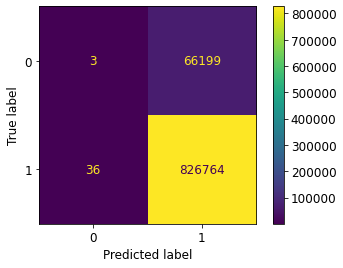

In [97]:
plot_confusion_matrix(model_elastic, X_test, y_test)
plt.show()

In [107]:
#logistic regression analysis lr Elastic Net Logistic
#Cross Validation (10-fold) average results of each fold
#Cross Validation is a very useful technique for assessing 
#the effectiveness of the model, particularly in cases where we need to mitigate over-fitting
dict_lr_elNet = {'Precision': make_scorer(precision_score),'Recall': make_scorer(recall_score),
              'F-score': make_scorer(f1_score),'Accuracy': make_scorer(accuracy_score), 
              'MSE': make_scorer(mean_squared_error)}
scores_lr_el = cross_validate(model_elastic, X, y, cv = 10, scoring = dict_lr_elNet)

In [122]:
#prints the report of Logistic regression tree using 10-fold cross validation in previous step

print ('Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):\n' )
print('Precision: ',(scores_lr_el['test_Precision']).mean()*100)
print('Recall: ',(scores_lr_el['test_Recall']).mean()*100)
print('F-score: ',(scores_lr_el['test_F-score']).mean()*100)
print('Accuracy: ',(scores_lr_el['test_Accuracy']).mean()*100)
print('MSE: ',(scores_lr_el['test_MSE']).mean()*100)

Logistic Regression: Average scores of precision, recall, F-score, and accuracy of each fold (cv=10):

Precision:  92.5874038229987
Recall:  99.99540396710206
F-score:  96.14892370565447
Accuracy:  92.58355523908325
MSE:  7.416444760916728
